In [1]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.model_selection import train_test_split

X,y = load_iris(return_X_y=True)

X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

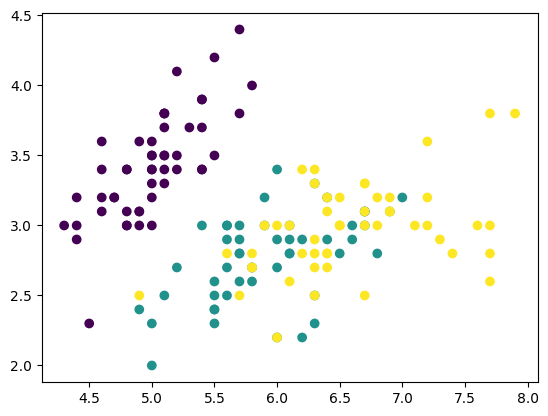

In [16]:
#show on graph
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#apply Gausian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)


GaussianNB()

In [6]:
y_pred = gnb.predict(X_test)

In [15]:
#check accuracy, matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



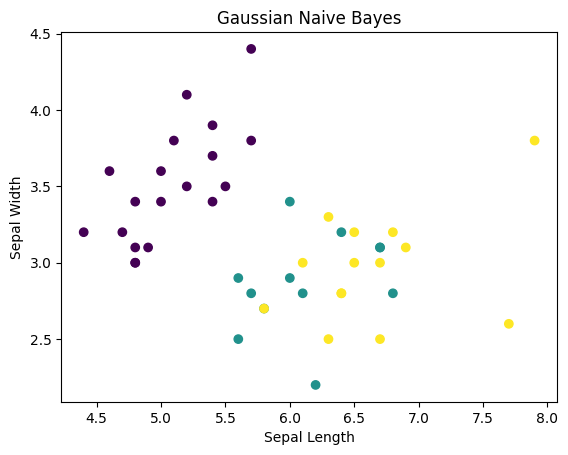

In [14]:
# draw on graph
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Gaussian Naive Bayes')


plt.show()


In [17]:
# perform the same in TIPS dataset
import seaborn as sns
import pandas as pd

tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [20]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [21]:
#convert categorical data('day','smoker','sex') to numerical
from sklearn.preprocessing import LabelEncoder

le1= LabelEncoder()
le2 = LabelEncoder()    
le3 = LabelEncoder()

tips['day'] = le1.fit_transform(tips['day'])
tips['sex'] = le2.fit_transform(tips['sex'])
tips['smoker'] = le3.fit_transform(tips['smoker'])

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,Dinner,2
1,10.34,1.66,1,0,2,Dinner,3
2,21.01,3.50,1,0,2,Dinner,3
3,23.68,3.31,1,0,2,Dinner,2
4,24.59,3.61,0,0,2,Dinner,4


In [26]:
#based on total_bill, tip, sex, smoker, day, size predict the time
X = tips[['total_bill','tip','sex','smoker','day','size']]
y = tips['time']

In [27]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train

,total_bill,tip,sex,smoker,day,size
234,15.53,3.00,1,1,1,2
227,20.45,3.00,1,0,1,4
180,34.65,3.68,1,1,2,4
5,25.29,4.71,1,0,2,4
56,38.01,3.00,1,1,1,4
...,...,...,...,...,...,...
106,20.49,4.06,1,1,1,2
14,14.83,3.02,0,0,2,2
92,5.75,1.00,0,1,0,2
179,34.63,3.55,1,1,2,2


In [29]:
#apply Gaussian Naive Bayes
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)

GaussianNB()

In [31]:
tips_pred = gnb2.predict(X_test)

In [32]:
#print acuracy, matrix and classification report
print(accuracy_score(y_test, tips_pred))
print(confusion_matrix(y_test, tips_pred))
print(classification_report(y_test, tips_pred))


0.9324324324324325
[[53  2]
 [ 3 16]]
              precision    recall  f1-score   support

      Dinner       0.95      0.96      0.95        55
       Lunch       0.89      0.84      0.86        19

    accuracy                           0.93        74
   macro avg       0.92      0.90      0.91        74
weighted avg       0.93      0.93      0.93        74

